# Adding an agent

In this section, we will add a new agent called `A2`. This agent will be slightly different to the other agents in the ```default``` example, in that it will make investments based upon a mixture of [levelised cost of electricity (LCOE)](https://en.wikipedia.org/wiki/Levelized_cost_of_energy) and [net present value (NPV)](https://en.wikipedia.org/wiki/Net_present_value). These two objectives will be combined by calculating the mean of the two when comparing potential investment options.

To achieve this, we must modify the ```Agents.csv``` file in the directory:

    {muse_install_location}/src/muse/data/example/default/technodata/Agents.csv

To do this, we will add two new rows to the file. To simplify the process, we copy the data from the first two rows of agent `A1`, changing only the rows: ```Name```, ```Objective1```, ```Objective2```, ```ObjData1```, ```ObjData2``` and ```DecisionMethod```. The values we changed can be seen below. Again, we only show some of the rows due to space constraints, however see [here](broken-link) for the full file.

|AgentShare|Name|AgentNumber|RegionName|Objective1|Objective2|Objective3|ObjData1|ObjData2|…|DecisionMethod|…|Type|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Agent1|A1|1|R1|LCOE|||1||…|singleObj|…|New|
|Agent2|A1|2|R1|LCOE|||1||…|singleObj|…|Retrofit|
|**Agent1**|**A2**|**1**|**R1**|**LCOE**|**NPV**||**1**|**1**|**…**|**mean**|**…**|**New**|
|**Agent2**|**A2**|**2**|**R1**|**LCOE**|**NPV**||**1**|**1**|**…**|**mean**|**…**|**Retrofit**|

We will now save this file and run the new simulation model using the following command:

    python -m muse settings.toml

Again, we use seaborn and pandas to analyse the data in the ```Results``` folder.

In [6]:
import pandas as pd
import seaborn as sns

In [19]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")
power_sector = mca_capacity[mca_capacity.sector=="power"]
power_sector.head()

,technology,region,agent,type,sector,capacity,year
2,gasCCGT,R1,A1,retrofit,power,1.000,2020
3,gasCCGT,R1,A2,retrofit,power,1.000,2020
10,gasCCGT,R1,A1,retrofit,power,1.000,2025
11,windturbine,R1,A1,retrofit,power,5.172,2025
12,gasCCGT,R1,A2,retrofit,power,11.000,2025


This time we can see that there is data for the new agent, `A2`. Next, we will visualise the investments made by each of the agents using seaborn's facetgrid command.

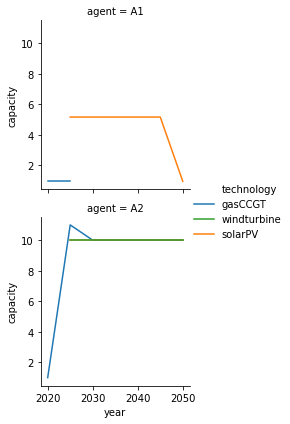

In [20]:
g=sns.FacetGrid(power_sector, row='agent')
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()

In this scenario, agent `A1` is investing using LCOE, whereas agent `A2` is investing based on the mean of the objectives: LCOE and NPV in the same region. A different strategy is employed by these agents with `A2` investing in gasCCGT and windturbines, whereas `A1` invests in solarPV.

Next, we will see what occurs if the agents invest based upon the same investment strategy, with both investing using NPV. This requires to edit the ```Agents.csv``` file once more, to look like the following:

|AgentShare|Name|AgentNumber|RegionName|Objective1|Objective2|Objective3|ObjData1|ObjData2|…|DecisionMethod|…|Type|
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|Agent1|A1|1|R1|LCOE|||1||…|singleObj|…|New|
|Agent2|A1|2|R1|LCOE|||1||…|singleObj|…|Retrofit|
|Agent1|A2|1|R1|**LCOE**|||**1**||…|**singleObj**|…|New|
|Agent2|A2|2|R1|**LCOE**|||**1**||…|**singleObj**|…|Retrofit|

Again, this requires the re-running of the simulation, and visualisation like before:

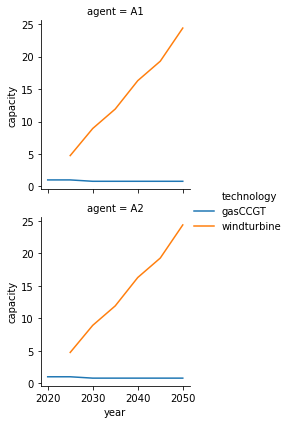

In [21]:
mca_capacity = pd.read_csv("../Results/MCACapacity.csv")
power_sector = mca_capacity[mca_capacity.sector=="power"]
g=sns.FacetGrid(power_sector, row='agent')
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()

In this new scenario, with both agents running the same objective, very similar results can be seen, with a high investmwent in ```windturbine```, none in ```solarPV``` and low ```gasCCGT```. Have a play around with the files to see if you can come up with different scenarios!

## Next steps 

In the next section we will show you how to add a new region.